# EGOR ZAITSEV - 07 452 541

# XIAO XU - 07 498 897

## Importing libraries and setting seed for reproducibility

In [3]:
import sys
import time

import numpy as np
import pandas as pd
import statsmodels.api as st
import matplotlib.pyplot as plt

np.random.seed(1337)

## Exercise 1

### A. Direct approach using matrix inversion

In [4]:
A = [[2, 0, 1], [0, 4, 1], [1, -1, 4]]
b = [30, 40, 15]

def directMethod(A, b):
    """
    Solves the linear system directly by inversion.

    Arguments:
    A - coefficient matrix
    b - ordinate vector

    Returns:
    x - solution vector
    """
    return np.dot(np.linalg.inv(A), b)

xDir = directMethod(A, b)

print('Solution vector x: {}'.format(xDir))
print('Check if x is correct: {}'.format(np.round(np.dot(A, xDir), 0) == b))

print('\n\nCoefficient matrix inversion is a direct method. We may use this method since the invertible of matrix A exists. Once this is not the case the solution to the system may be approximated with the help of iterative methods')

Solution vector x: [13.66666667  9.33333333  2.66666667]
Check if x is correct: [ True  True  True]


Coefficient matrix inversion is a direct method. We may use this method since the invertible of matrix A exists. Once this is not the case the solution to the system may be approximated with the help of iterative methods


### B. Iterative approch using Gauss-Seidel algorithm

In [5]:
def gaussSeidel(A, b, maxIter=10e3, tol=1/10e3):
    """
    Solves the linear system via Gauss-Seidel iterative method. The initial guess is
    take as a null-vector of length of ordinate vector

    Arguments:
    A - coefficient matrix
    b - ardinate vector

    Returns:
    x - convergence vector
    """
    # check diagonal dominance of A
    for i in range (len(b)):
        diag = A[i][i]
        nondiag = 0
        for j in range(len(b)):
            nondiag += A[i][j] # sum of row elements

        if 2 * diag - nondiag < 0: # diag is multiplied by two since nondiag includes diag
            print('Matrix A is not strictly diagonally dominant at row: {}'.format(i))
    
    # start iteration
    iteration = 0
    iterCond = 0
    error = 1
    errorCond = 0
    x0 = [0.0 for i in range(len(b))]
    L = np.tril(A) # lower triangular matrix
    U = A - L # upper triangular matrix

    while iterCond or errorCond != 1:
        x1 = np.dot(np.linalg.inv(L), b - np.dot(U, x0))
        error = np.linalg.norm(x1-x0)
        iteration += 1
        x0 = x1

        if error < tol:
            errorCond = 1
        elif iterCond > maxIter:
            iterCond = 1
    
    return x0, iteration
    
xConv, iteration = gaussSeidel(A, b)
print('Vector x {} converged at iteration {}'.format(xConv, iteration))

print('\n\n Since the matrix is strictly diagonally dominant we may use the Gauss-Seidel method. The coefficient matrix is of shape (3,3) hence the method converged relatively fast. Due to very low error tolerance of 1/10e3 convergence vector x is very close to solution vector x found with the direct method of inversion of coefficient matrix')

Vector x [13.66666794  9.33333397  2.66666651] converged at iteration 6


 Since the matrix is strictly diagonally dominant we may use the Gauss-Seidel method. The coefficient matrix is of shape (3,3) hence the method converged relatively fast. Due to very low error tolerance of 1/10e3 convergence vector x is very close to solution vector x found with the direct method of inversion of coefficient matrix


### C. Condition number calculation

In [6]:
def conditionNumber(A):
    return np.linalg.det(np.linalg.inv(A)) * np.linalg.det(A)

k = conditionNumber(A)

print('Condition number k(A): {}'.format(k))

print('\n\nThe condition number equals 1. That means if we imposed a zero-error tolerance on the iterative method, it could in principle converge to true solution vector. However, the condition number says nothing with regards to the speed of convergence. Greater values of k imply precision loss of convergence vectors.')


Condition number k(A): 1.0


The condition number equals 1. That means if we imposed a zero-error tolerance on the iterative method, it could in principle converge to true solution vector. However, the condition number says nothing with regards to the speed of convergence. Greater values of k imply precision loss of convergence vectors.


## Exercise 2

### A. Epsilon calculation via while and for loops

In [7]:
def epsilonWhileLoop(tol):
    """
    Calculates the lowest possible value (epsilon_m) for a 'em + 0 > tol' condition in a while loop

    Arguments:
    tol - tolerance level. May take on any value in [0, 1]. Designed specifically for this function to converge faster. If set to zero, epsilon_m converges to the true epsilon of Python

    Returns:
    em - epsilon_m. The convergence function is epsilon_m = epsilon_m / 2
    """
    em = 1

    while em + 0 > tol:
        em = em/2 # convergence assumption
    
    return em, tol

emW, tolW = epsilonWhileLoop(1/10e4)

print('WHILE LOOP: e_m for a given tolerance level of {} is {}'.format(tolW, emW))

def epsilonForLoop(tol, numIter):
    """
    Calculates the lowest possible value (epsilon_m) for a 'em + 0> tol' condition in a for loop

    Arguments:
    tol - tolerance level. May take on any value in [0, 1]. Designed specifically for this function to converge faster. If set to zero, epsilon_m converges to the true epsilon of Python
    numIter - maximum number of iterations. If set to infinity, the argument is ignored as a stopping condition.

    Returns:
    em - epsilon_m. The convergence function is epsilon = epsilon / 2
    """
    em = 1

    for i in range(numIter):
        if em + 0 > tol:
            em = em/2
        else:
            return em, tol, i

emF, tolF, iterationF  = epsilonForLoop(1/10e4, 1000)

print('FOR LOOP: e_m for a given tolerance level of {} is {}. For a defined convergence function it took {} iterations to reach the value below the tolerance'.format(tolF, emF, iterationF))

print('\n\nThe system epsilon is given by {}. It is the lowest possible value in Python which may be checked by the condition e + 0 > 0'.format(sys.float_info.epsilon))

WHILE LOOP: e_m for a given tolerance level of 1e-05 is 7.62939453125e-06
FOR LOOP: e_m for a given tolerance level of 1e-05 is 7.62939453125e-06. For a defined convergence function it took 17 iterations to reach the value below the tolerance


The system epsilon is given by 2.220446049250313e-16. It is the lowest possible value in Python which may be checked by the condition e + 0 > 0


### B. Time measures for matrix additivity and product

In [8]:
A = np.random.rand(400, 600)
B = np.random.rand(400, 600)

def matrixSum(A, B):
    """
    Performs matrix summation operation

    Arguments:
    A - input matrix 1
    B - input matrix 2

    Returns:
    C - output matrix
    """
    C = np.zeros([400, 600]) # define a zero-matrix of shape (400,600)
    
    for i in range(A.shape[0]): # iterate over row values
        for ii in range(A.shape[1]): # iterate over column values
            C[i, ii] = A[i, ii] + B[i, ii]

    return C

startA = time.time()
C = A + B
endA = time.time()

startM = time.time()
C = matrixSum(A, B)
endM = time.time()

print('Time elapsed for an automatic summation: {}'.format(endA-startA))
print('Time elapsed for a manual summation: {}'.format(endM-startM))

def matrixProd(A, B):
    C = np.zeros([A.shape[0], B.shape[0]]) # defines a zero-matrix of shape (A.shape[1], B.shape[0])

    for i in range(A.shape[0]):
        for ii in range(B.shape[0]):
            for iii in range(B.shape[1]):
                C[i, ii] += A[i, iii] * B[ii, iii]

    return C

startA = time.time()
CA = np.dot(A, np.transpose(B))
endA = time.time()

startM = time.time()
CM = matrixProd(A, B)
endM = time.time()

print('Time elapsed for an automatic product: {}'.format(endA-startA))
print('Time elapsed for a manual product: {}'.format(endM-startM))
print('\nCheck condition the manual function is correct {}'.format(
    np.round(CA, 2) == np.round(CM, 2)))
print('\n\n Put simply, legacy code and open-source code is much more efficient compared to our options. The reason behind this is that the core of such operators is written in C++ (which is much faster), and Python is just a wrapper')

Time elapsed for an automatic summation: 0.0009992122650146484
Time elapsed for a manual summation: 0.1858675479888916
Time elapsed for an automatic product: 0.0039899349212646484
Time elapsed for a manual product: 95.35679531097412

Check condition the manual function is correct [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


 Put simply, legacy code and open-source code is much more efficient compared to our options. The reason behind this is that the core of such operators is written in C++ (which is much faster), and Python is just a wrapper


## Exercise 3

[0.18813647 0.73559724 0.61380536 0.23062902 0.25430818 0.56762818
 0.81894421 0.44615588 0.48723152 0.42481824]
The mean and the std of z are 0.98079 and 1.44119
The mean and the std of z are 1.00049 and 1.4146


Increasing sample size from 1k to 1kk does contribute to a better precision of sample means and deviations to their corresponding true values. However, these adjustments are relatively weak compared to the increase of the sample size by 1k times


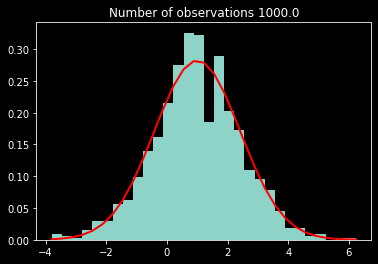

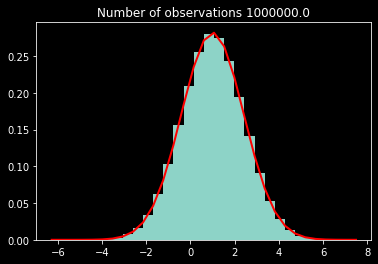

In [9]:
# a) Creating a vector of shape 10 filled with random numbers from a standard normal distribution
x = np.random.rand(10)
print (x)

# b) Calculating the mean and the standard deviation of x
Ex = np.mean(x)
Sx = np.std(x)

# c) Creating a random variable z
mu = 1
sigma = np.sqrt(2)
z = np.random.normal(mu, sigma, 10)

# d) Calculating the mean and the standard deviation of z
Ez = np.mean(z)
Sz = np.std(z)

# e) Increasing sample size for z
numObs = [10e2, 10e5]


for n in numObs:
    z = np.random.normal(mu, sigma, int(n))
    Ez = np.mean(z)
    Sz = np.std(z)

    print('The mean and the std of z are {} and {}'.format(np.round(Ez, 5), np.round(Sz, 5)))
    fig, ax = plt.subplots()
    count, bins, ignored = ax.hist(z, 30, density=True)
    ax.plot(
        bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),
        linewidth=2, color='r')
    ax.set_title('Number of observations ' + str(n)) 

print('\n\nIncreasing sample size from 1k to 1kk does contribute to a better precision of sample means and deviations to their corresponding true values. However, these adjustments are relatively weak compared to the increase of the sample size by 1k times')

## Exercise 4

In [13]:
def olsEstimator(n):
    """
    Computes the estimator for beta using the standardazied OLS approach and setup from the problem 4.

    Arguments:
    X - matrix of covariates
    y - vector of dependables

    Returns:
    b - estimates of coefficient vector
    """
    mu = 0 # expected value of normal distribution
    sigma = 1 # variance = standard deviation of normal distribution
    low = 0 # lowest boundary of uniform distribution
    high = 100 # highest boundary of uniform distribution

    e = np.random.normal(mu, sigma, n) # normally distributed normalized error term
    x1 = np.random.uniform(low, high, n) # vector of features 1
    x2 = np.random.uniform(low, high, n) # vector of features 3
    X = np.transpose(np.matrix([np.ones(n), x1, x2])) # matrix of features with intercept

    y = np.transpose(np.dot(X,bTrue) + e) # explained vector

    return np.dot(
        np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), y))

numObs = [10, 100000]
bTrue = np.array([2, 3, 5]) # true beta vector

for n in numObs:

    bStar = olsEstimator(n)

    print('n = {}: OLS estimates for beta are\n{}'.format(n, bStar))
    print('Difference between true values and estimated values is\n{}\n\n'.format(
        bStar - bTrue.reshape(3, 1)))

print('The more observations we have the more closely the OLS estimations approach the true values of coefficient vector beta')

n = 10: OLS estimates for beta are
[[2.13578031]
 [3.01052757]
 [5.0020262 ]]
Difference between true values and estimated values is
[[0.13578031]
 [0.01052757]
 [0.0020262 ]]


n = 100000: OLS estimates for beta are
[[2.00437305]
 [2.99993455]
 [4.99995564]]
Difference between true values and estimated values is
[[ 4.37304652e-03]
 [-6.54482716e-05]
 [-4.43636395e-05]]


The more observations we have the more closely the OLS estimations approach the true values of coefficient vector beta


## Exercise 5

As seen from first two graphs HP filter approximates the trend component of both time series pretty well. This trend may be used as input data for further nonlinear analysis. As seen from graph three the cyclical component of the UE cycle is much stronger compared to the EU cycle.


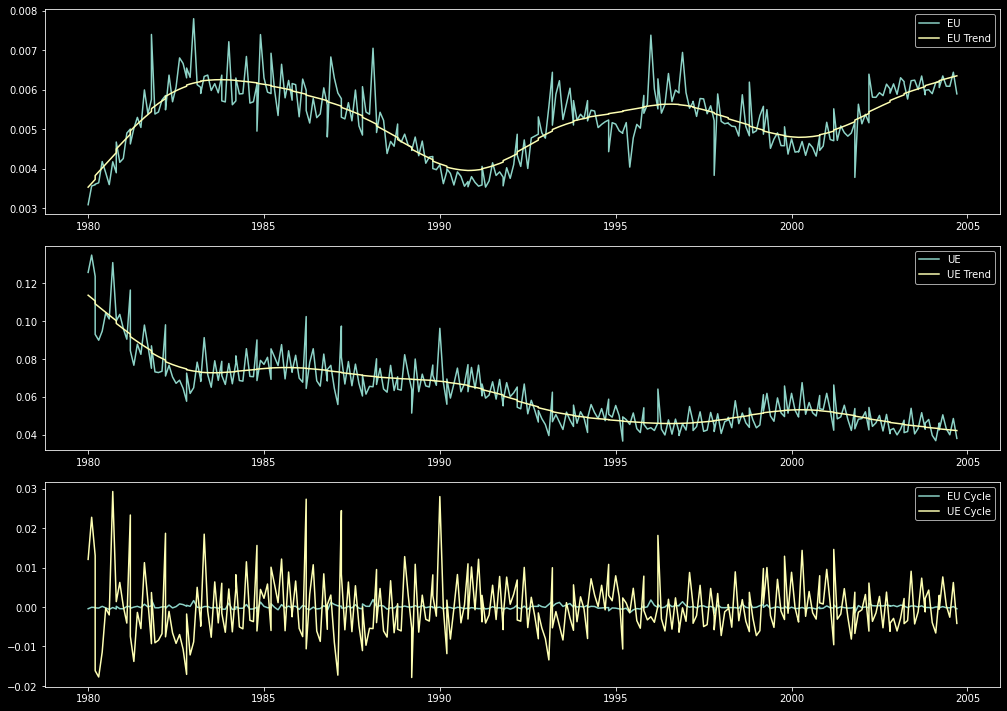

In [11]:
workerflows = pd.read_excel("../Helpers/workerflows.xlsx", usecols="A:F", header=0)

lam = 14400
cycleEU, trendEU = st.tsa.filters.hpfilter(workerflows['EU'], lam) # cycle and trend component of log EU
cycleUE, trendUE = st.tsa.filters.hpfilter(workerflows['UE'], lam) # cycle and trend component of log UE

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 10))
fig.tight_layout()
ax1.plot(np.round(workerflows['Unnamed: 0'], 1), workerflows['EU'], label='EU')
ax1.plot(np.round(workerflows['Unnamed: 0'], 1), trendEU, label='EU Trend')
ax1.legend()
ax2.plot(np.round(workerflows['Unnamed: 0'], 1), workerflows['UE'], label='UE')
ax2.plot(np.round(workerflows['Unnamed: 0'], 1), trendUE, label='UE Trend')
ax2.legend()
ax3.plot(np.round(workerflows['Unnamed: 0'], 1), cycleEU, label='EU Cycle')
ax3.plot(np.round(workerflows['Unnamed: 0'], 1), cycleUE, label='UE Cycle')
ax3.legend()

print('As seen from first two graphs HP filter approximates the trend component of both time series pretty well. This trend may be used as input data for further nonlinear analysis. As seen from graph three the cyclical component of the UE cycle is much stronger compared to the EU cycle.')